## Load and split rooftops for Kilifi

In [2]:
%load_ext autoreload
%autoreload 2

import geopandas as gpd
import pandas as pd
from pathlib import Path
from os import makedirs
import matplotlib.pyplot as plt

In [ ]:
# Paths to files
INPUT_PATH = Path("../data/01_Raw data/")
OUTPUT_PATH = Path("../data/03_Output/Kilifi -- Kenya/")

CLEANED_DATA_PATH = OUTPUT_PATH / "00_utils_data"
PREPROCESSED_PATH = Path("../data/03_Output/Kilifi -- Kenya/01_filtered_shapes")
SAMPLES_PATH = Path("../data/03_Output/Kilifi -- Kenya/02_sampled_locations_and_rooftops")

WARD_SHP = INPUT_PATH / "02_Admin boundary data/Kenya/kenya_wards/Kenya wards.shp"


merged_subcounty_locations = OUTPUT_PATH / "00_utils_data/Merged sublocation census.csv"

In [14]:
county_kilifi = gpd.read_file(CLEANED_DATA_PATH / "Kilifi_county.kml", driver="KML")

In [17]:
# Get wards within Kilifi county
wards = gpd.read_file(WARD_SHP)
wards.set_crs(epsg=4326, inplace=True)

wards_kilifi = wards[wards.geometry.within(county_kilifi.unary_union.buffer(0.01))].copy()

/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_99515/2257887114.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  wards_kilifi = wards[wards.geometry.within(county_kilifi.unary_union.buffer(0.01))].copy()


In [18]:
wards_kilifi

,IEBC_WARDS,COUNT,FIRST_PROV,FIRST_DIST,FIRST_DIVI,PCODE,STATUS,NO,SHAPE_1,STATUS_1,geometry
9,Adu,8,Coast,Malindi,Malindi,KE0011,None,83.0,Polygon,None,"POLYGON ((39.63016 -3.09363, 39.63 -3.0937, 39..."
50,Bamba,10,Coast,Kilifi,Bamba,KE0052,None,72.0,Polygon,None,"POLYGON ((39.53103 -3.62951, 39.53106 -3.62975..."
57,Malindi Town,1,Coast,Malindi,Malindi,KE0059,None,78.0,Polygon,done,"POLYGON ((40.11988 -3.21394, 40.11985 -3.2141,..."
148,Chasimba,5,Coast,Kilifi,Chonyi,KE0150,None,61.0,Polygon,None,"POLYGON ((39.77382 -3.66937, 39.77542 -3.67111..."
193,Dabaso,4,Coast,Malindi,Malindi,KE0195,None,54.0,Polygon,None,"POLYGON ((39.98831 -3.3149, 39.98834 -3.31501,..."
212,Dungicha,9,Coast,Kilifi,Bamba,KE0214,None,NaN,None,None,"POLYGON ((39.80716 -3.48888, 39.80693 -3.49414..."
266,Ganda,4,Coast,Malindi,Malindi,KE0268,None,77.0,Polygon,None,"POLYGON ((40.07188 -3.18761, 40.07156 -3.18789..."
269,Garashi,9,Coast,Malindi,Marafa,KE0271,None,84.0,Polygon,None,"POLYGON ((40.02925 -3.03791, 40.02865 -3.03887..."
313,Gongoni,4,Coast,Malindi,Magarini,KE0315,None,82.0,Polygon,None,"POLYGON ((40.17129 -2.89896, 40.17109 -2.89929..."
376,Jaribuni,9,Coast,Kilifi,Ganze,KE0378,None,73.0,Polygon,None,"POLYGON ((39.7587 -3.603, 39.76476 -3.60297, 3..."


In [58]:
# Sampled sublocations for one subcounty -- for example
subcounty = "Ganze Sub County"
sublocation_within_sucounty = "PAZIANI"

sublocation_shapefile = gpd.read_parquet(SAMPLES_PATH / subcounty / "sampled_sublocations.parquet")
sublocation_shapefile = sublocation_shapefile[sublocation_shapefile.SLNAME == sublocation_within_sucounty]

sublocation_rooftops = gpd.read_parquet(SAMPLES_PATH / subcounty / f"2_{sublocation_within_sucounty}_sampled_rooftops.parquet")

<Axes: >

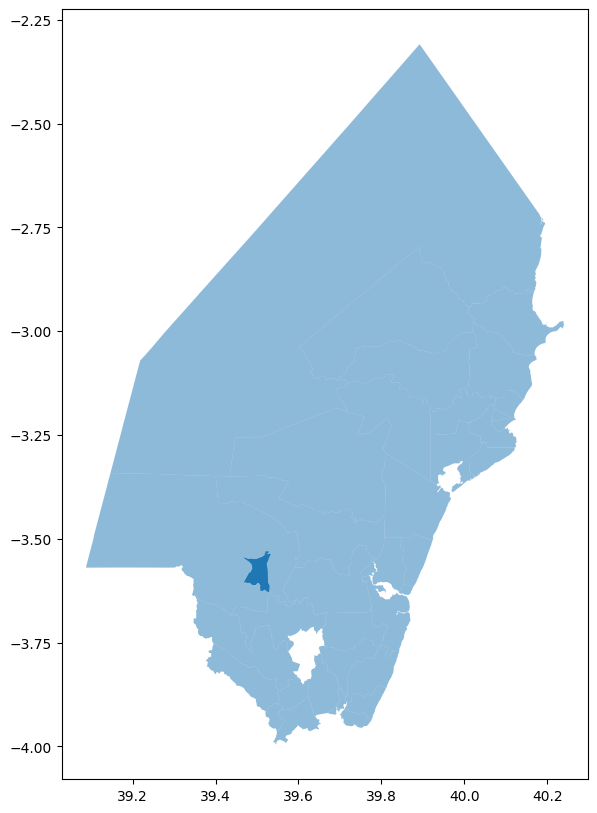

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
sublocation_shapefile.plot(ax=ax)
wards_kilifi.plot(ax=ax, alpha=0.5)

In [72]:
wards_within_sublocation = []
for _, ward in wards_kilifi.iterrows():
    if ward.geometry.intersects(sublocation_shapefile.geometry).tolist()[0]:
        wards_within_sublocation.append(ward)

wards_within_sublocation = gpd.GeoDataFrame(wards_within_sublocation, crs=wards_kilifi.crs)

In [74]:
sublocation_rooftops["ward"] = ""
for i, rooftop in sublocation_rooftops.iterrows():
    for _, ward in wards_within_sublocation.iterrows():
        if rooftop.geometry.within(ward.geometry):
            sublocation_rooftops.loc[i, "ward"] = ward.IEBC_WARDS

            

In [75]:
sublocation_rooftops

,geometry,boundary_id,bf_source,confidence,area_in_meters,num_neighbours,ward
24827685,"POLYGON ((39.51414 -3.60226, 39.51413 -3.60223...",343,microsoft,NaN,28.802826,17,Bamba
25094496,"POLYGON ((39.52607 -3.54434, 39.52602 -3.54433...",343,google,0.7831,49.699400,34,Bamba
24920758,"POLYGON ((39.52361 -3.54376, 39.5236 -3.54372,...",343,google,0.7936,24.345400,38,Bamba
25141425,"POLYGON ((39.52286 -3.54443, 39.52279 -3.54434...",343,google,0.8892,140.798300,58,Bamba
25354847,"POLYGON ((39.52661 -3.54198, 39.52662 -3.54187...",343,google,0.8932,97.065700,48,Bamba
24883788,"POLYGON ((39.49084 -3.559, 39.49082 -3.55893, ...",343,google,0.8767,40.980600,25,Bamba
25024169,"POLYGON ((39.52278 -3.53841, 39.52278 -3.53836...",343,google,0.8260,32.993600,56,Bamba
25150870,"POLYGON ((39.52371 -3.54467, 39.52363 -3.54466...",343,google,0.8695,75.800900,37,Bamba
25279095,"POLYGON ((39.52084 -3.54407, 39.5208 -3.54406,...",343,google,0.7058,14.578200,93,Bamba
25110286,"POLYGON ((39.51313 -3.60257, 39.51312 -3.60254...",343,google,0.8413,24.105100,22,Bamba
